In [1]:
cd

C:\Users\jerem\Box Sync\Policy Evaluation\dofiles


In [2]:
cd "..\working_data\analytical_panel_shapefile\"
// Convert shapefile to dta
*spshape2dta "analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan", replace
// Already ran this

C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile


In [3]:
clear

In [4]:
use "analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan",clear

In [5]:
codebook _CY _CX


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_CY                                                                                                                                                                                                                               y-coordinate of area centroid
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (double)

                 range:  [40.700958,40.876938]        units:  1.000e-09
         unique values:  2,736                    missing .:  0/2,736

                  mean:   40.7718
          

In [6]:
gen test =  _CY == y_left
tab test
gen test2 = _CX == x_left
tab test2




       test |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00



      test2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00


In [7]:
drop test test2

In [8]:
gen quarterly = yq(year_left, quarter_le)
format quarterly %tq

In [9]:
tab quarterly, nolabel


  quarterly |      Freq.     Percent        Cum.
------------+-----------------------------------
     2012q3 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00


In [10]:
// Left this in here in case I use the full panel shapefile
keep if quarterly == tq(2012q3)

(0 observations deleted)


In [11]:
codebook _ID


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID                                                                                                                                                                                                                                             Spatial-unit ID
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [1,2736]                     units:  1
         unique values:  2,736                    missing .:  0/2,736

                  mean:    1368.5
              std. de

In [12]:
duplicates tag _ID _CY _CX, gen(dup)
tab dup
drop dup



Duplicates in terms of _ID _CY _CX


        dup |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,736      100.00      100.00
------------+-----------------------------------
      Total |      2,736      100.00



In [13]:
codebook intersecti
codebook intersecti if flag_LPIS_ == 1
codebook intersecti if flag_LPIS_ == 0



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
intersecti                                                                                                                                                                                                                                           intersecti
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [1,4218]                     units:  1
         unique values:  2,736                    missing .:  0/2,736

                  mean:   1450.23
              std. d

In [14]:
describe, fullname


Contains data from analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
  obs:         2,736                          
 vars:            35                          22 Feb 2019 15:49
 size:       205,200                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID             int     %12.0g                Spatial-unit ID
_CX             double  %10.0g                x-coordinate of area 

In [15]:
spset
spset, coordsys(latlong, miles) modify 


  Sp dataset analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                data:  cross sectional
     spatial-unit id:  _ID
         coordinates:  _CX, _CY (planar)
    linked shapefile:  analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan_shp.dta

  Sp dataset analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                data:  cross sectional
     spatial-unit id:  _ID
         coordinates:  _CY, _CX (latitude-and-longitude, miles)
    linked shapefile:  analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan_shp.dta



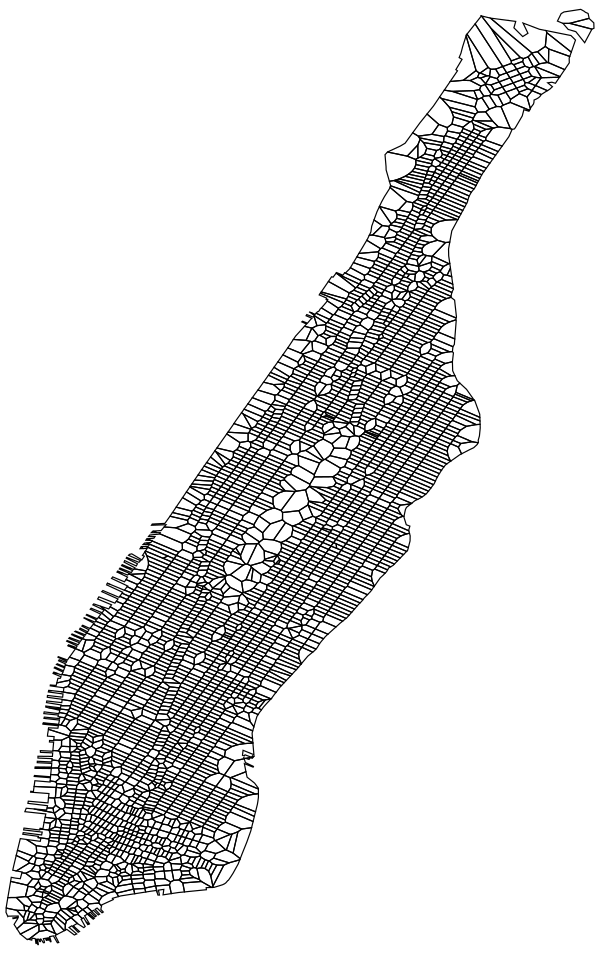

In [16]:
grmap

### Calculate Contiguity and Inverse Distance matrix

In [17]:
// Create Matrix W
/*
spmatrix create contiguity W
cd "..\"
cd "..\working_data\"
spmatrix save W using "contiguity_W.stswm"
*/

In [18]:
/*
spmatrix export W using "contiguity_W"
clear
import delimited using "contiguity_W.txt" , delimiters(" ")
drop if mi(v2)
save "contiguity_W.dta"
*/

In [19]:
// Create Matrix M
/*
cd "..\working_data\analytical_panel_shapefile\"
spmatrix create idistance M if quarter==3 & year == 2012
cd "..\"
cd "..\working_data\"
spmatrix save M using "idistance_M.stswm"
*/

### Use saved matrix

In [20]:
cd

C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile


In [21]:
cd "..\"
*cd "..\working_data\"
spmatrix use W using "contiguity_W.stswm"
*spmatrix use M using "idistance_M.stswm"


C:\Users\jerem\Box Sync\Policy Evaluation\working_data



In [22]:
spmatrix summarize W


Weighting matrix  W
---------------------------------------
           Type |           contiguity
  Normalization |             spectral
      Dimension |          2736 x 2736
Elements        |
   minimum      |                    0
   minimum > 0  |             .1600261
   mean         |             .0003389
   max          |             .1600261
Neighbors       |
   minimum      |                    2
   mean         |              5.79386
   maximum      |                   12
---------------------------------------


In [23]:
cd "..\dofiles"

C:\Users\jerem\Box Sync\Policy Evaluation\dofiles


In [24]:
spmatrix dir


------------------------------------------------------------------------
   Weighting matrix name           N x N      Type         Normalization
------------------------------------------------------------------------
                       W     2736 x 2736    contiguity       spectral
------------------------------------------------------------------------


In [25]:
keep _ID _CX _CY intersecti

In [26]:
mmerge intersecti using "..\working_data\analytical_file_panel_qt.dta", ///
type(1:n) ///
unmatched(master) ///
umatch(intersection_id)



-------------------------------------------------------------------------------
merge specs          |
       matching type | 1:n
  mv's on match vars | none
  unmatched obs from | master
---------------------+---------------------------------------------------------
  master        file | analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
                 obs |   2736
                vars |      4
          match vars | intersecti  (key)
  -------------------+---------------------------------------------------------
  using         file | ..\working_data\analytical_file_panel_qt.dta
                 obs | 324675
                vars |    163
          match vars | intersection_id  (not a key)
---------------------+---------------------------------------------------------
variable intersecti does not uniquely identify observations in C:\Users\jerem\AppData\Local\Temp\ST_46f8_000002.tmp
result          file | analytical_panel_qt_shapefile_crosssec_thiessen_

In [27]:
describe


Contains data from analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.dta
  obs:        68,400                          
 vars:           167                          22 Feb 2019 15:49
 size:    45,007,200                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID             int     %12.0g                Spatial-unit ID
_CX             double  %10.0g                x-coordinate of area 

collision_count byte    %9.0g                 No. of collisions occured during that month
latenight_col~t byte    %9.0g                 No. of collisions occured during that month between 11pm - 5am
day_collision~t byte    %9.0g                 No. of collisions occured during that month between 5am - 11pm
personsinjured  byte    %10.0g                No. of persons injured during that month
personskilled   byte    %10.0g                No. of persons killed during that month
pedestriansin~d byte    %10.0g                No. of pedestrians injured during that month
pedestrianski~d byte    %10.0g                No. of pedestrians killed during that month
cyclistinjured  byte    %10.0g                No. of cyclist injured during that month
cyclistkilled   byte    %10.0g                No. of cyclist killed during that month
motoristinjured byte    %10.0g                No. of motorist injured during that month
motoristkilled  byte    %10.0g                No. of motorist killed during t

In [28]:
sort _ID  quarterly 

In [29]:
xtset _ID quarterly, quarterly

       panel variable:  _ID (strongly balanced)
        time variable:  quarterly, 2012q3 to 2018q3
                delta:  1 quarter


In [30]:
cd "..\manuscripts"

C:\Users\jerem\Box Sync\Policy Evaluation\manuscripts


## Visualization


C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile

(65,664 observations deleted)


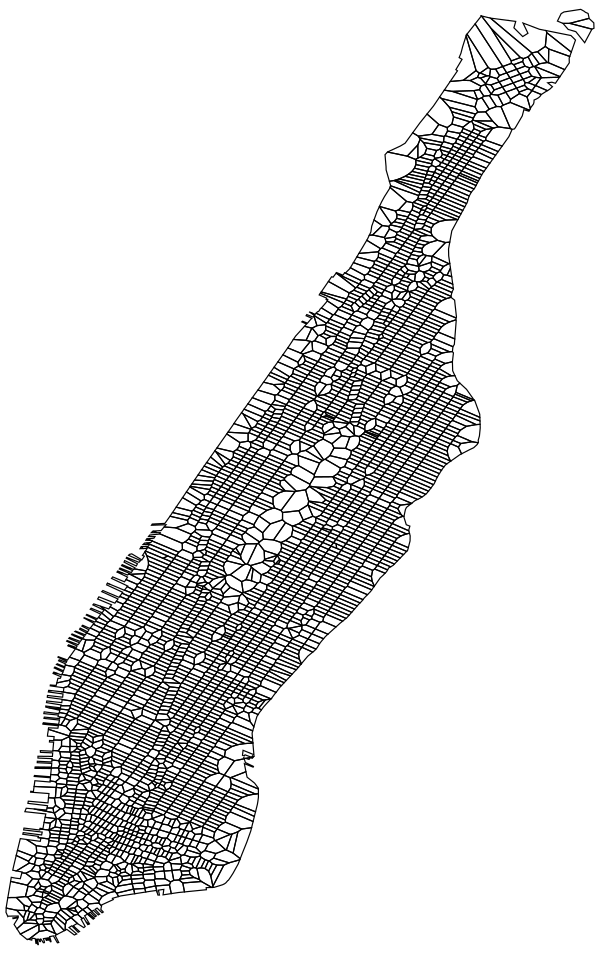

In [31]:
cd "..\working_data\analytical_panel_shapefile\"
grmap,t(210)

In [32]:
egen total_collisions = total(collision_count), by(_ID)

In [33]:
gen avg_collisions = total_collisions/25

In [34]:
cd

C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile


(65,664 observations deleted)


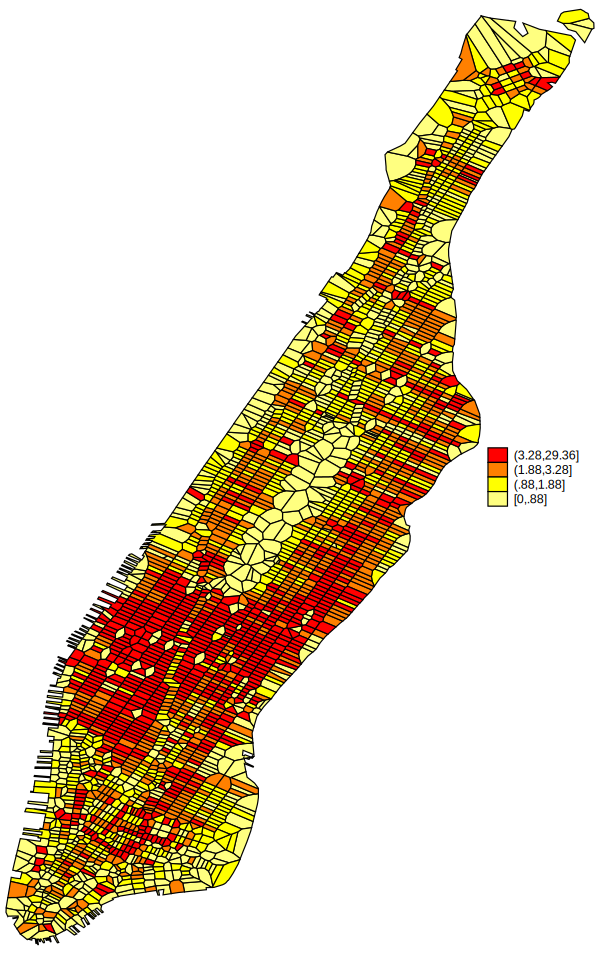

In [35]:
*cd "..\working_data\analytical_panel_shapefile\"
grmap avg_collisions, t(210) clmethod(quantile) legend(position(3)) fcolor(Heat)
// Note that the graph viewed here is not correctly depicting the data
//graph export "D:\Box Sync\Policy Evaluation\manuscripts\choroplethmapmanhattan_avgcollision.png",as(png) replace

In [36]:
tab flag_LPIS_ever if quarterly == 210


  Indicates |
        the |
intersectio |
  n if they |
       ever |
   received |
       LPIS |
interventio |
          n |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,063       75.40       75.40
          1 |        673       24.60      100.00
------------+-----------------------------------
      Total |      2,736      100.00


(65,664 observations deleted)


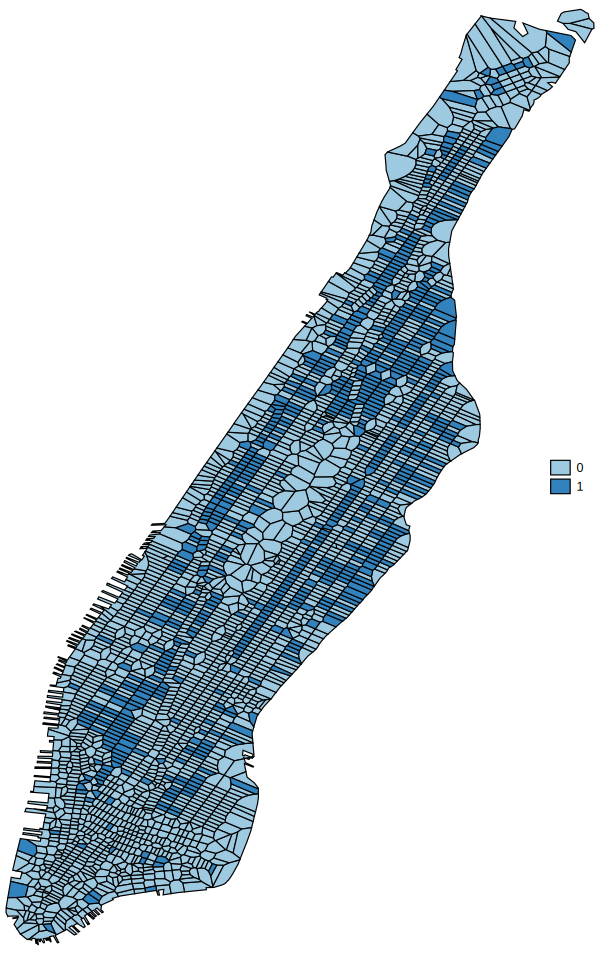

In [37]:
grmap flag_LPIS_ever,clmethod(unique) t(210) fcolor(Blues) legend( position(3)) 
//graph export "D:\Box Sync\Policy Evaluation\manuscripts\choroplethmapmanhattan_lpis.png",as(png) replace
// Note the graphic display here is wrong, but the exported png copy is correct

## Base line averages

In [38]:
* Average number of collisions before LPIs were implemented at LPIs intersections
sum collision_count if flag_LPIS_ever == 1 & flag_LPIS == 0


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
collision_~t |     11,663    3.115751    3.042033          0         33


In [39]:
* Average number of persons injured before LPIs were implemented at LPIs intersections
sum personsinjured if flag_LPIS_ever == 1 & flag_LPIS == 0


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
personsinj~d |     11,663    .6299408    1.132714          0         15


In [40]:
codebook _ID if flag_LPIS_ever == 1


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID                                                                                                                                                                                                                                             Spatial-unit ID
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [6,2730]                     units:  1
         unique values:  673                      missing .:  0/16,825

                  mean:   1533.09
              std. d

In [41]:
codebook _ID if flag_LPIS_ever == 0


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
_ID                                                                                                                                                                                                                                             Spatial-unit ID
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [1,2736]                     units:  1
         unique values:  2,063                    missing .:  0/51,575

                  mean:   1314.81
              std. d

In [42]:
global time_var i.quarterly
global time_variant_var bike_route_tv flag_street_improv flag_left_turn
global time_trend i.flag_school##i.quarterly i.flag_priorityinters##i.quarterly i.flag_seniors##i.quarterly

## Spatial Lag Model

In [43]:
cd
cd "..\"


C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile

C:\Users\jerem\Box Sync\Policy Evaluation\working_data


In [44]:
cd "..\manuscripts"
global filename splm_qt_results_xt


C:\Users\jerem\Box Sync\Policy Evaluation\manuscripts



In [45]:
// Spatial Lagged Model collision_count
global outcome collision_count
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)
outreg2 using "$filename", word replace ctitle(spxtregress fe $outcome) title(Spatial Lagged Model)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -133972.25  
Iteration 1:   log likelihood = -133970.39  
Iteration 2:   log likelihood = -133970.39  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -133970.39  
Iteration 1:   log likelihood = -133970.39  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =    7445.38
                                                Prob > chi2       =     0.0000
Log likelihood = -1.340e+05                     Pseudo R2         =     0.0036

------------------------------

                       1 228  |   -3.82152   .3951202    -9.67   0.000    -4.595941   -3.047099
                       1 229  |  -3.781369   .3950642    -9.57   0.000    -4.555681   -3.007057
                       1 230  |  -3.995494   .3953501   -10.11   0.000    -4.770366   -3.220621
                       1 231  |  -4.256165   .3954148   -10.76   0.000    -5.031164   -3.481167
                       1 232  |  -3.666383   .3954135    -9.27   0.000     -4.44138   -2.891387
                       1 233  |  -3.586055   .3953749    -9.07   0.000    -4.360975   -2.811135
                       1 234  |  -3.871123   .3953709    -9.79   0.000    -4.646035    -3.09621
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .2086088   .1115945     1.87   0.062    -.0101125    .4273301
                       1 212  |    .006489   .1115835     0.06   0.954    -.212210

In [48]:
estat impact flag_LPIS



progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.1063638   .0378835    -2.81   0.005    -.1806141   -.0321134
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0219132   .0078668    -2.79   0.005    -.0373318   -.0064946
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |   -.128277   .0457104    -2.81   0.005    -.2178678   -.0386861
------------------------------------------------------------------------------

splm_qt_results_xt.rtf
dir : seeout

. rend, fe vce(c

r(199);
r(199);


In [49]:
// Spatial Lagged Model personsinjured
global outcome personsinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -83705.847  
Iteration 1:   log likelihood = -83702.951  
Iteration 2:   log likelihood = -83702.951  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -83702.951  
Iteration 1:   log likelihood = -83702.951  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =    1057.24
                                                Prob > chi2       =     0.0000
Log likelihood = -8.370e+04                     Pseudo R2         =     0.0008

------------------------------

                       1 228  |  -1.170448   .1842545    -6.35   0.000     -1.53158   -.8093155
                       1 229  |  -.4444053    .184239    -2.41   0.016     -.805507   -.0833036
                       1 230  |  -1.291143   .1843656    -7.00   0.000    -1.652492   -.9297927
                       1 231  |  -1.247607   .1843954    -6.77   0.000    -1.609015   -.8861985
                       1 232  |  -1.350357   .1843931    -7.32   0.000    -1.711761   -.9889535
                       1 233  |  -1.143716   .1843826    -6.20   0.000    -1.505099   -.7823328
                       1 234  |   -1.15723   .1843822    -6.28   0.000    -1.518612   -.7958472
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0460779   .0520377     0.89   0.376    -.0559141    .1480699
                       1 212  |   .0143304   .0520378     0.28   0.783    -.087661

In [50]:
estat impact flag_LPIS


progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.0642561    .017567    -3.66   0.000    -.0986869   -.0298253
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0010319   .0005169    -2.00   0.046    -.0020449   -.0000189
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |   -.065288   .0178525    -3.66   0.000    -.1002783   -.0302978
------------------------------------------------------------------------------


In [51]:
// Spatial Lagged Model pedestriansinjured
global outcome pedestriansinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood =   -39361.9  
Iteration 1:   log likelihood = -39361.896  
Iteration 2:   log likelihood = -39361.896  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -39361.896  
Iteration 1:   log likelihood = -39361.896  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =    1022.21
                                                Prob > chi2       =     0.0000
Log likelihood = -3.936e+04                     Pseudo R2         =     0.0000

------------------------------

                       1 228  |  -.4703037   .0937916    -5.01   0.000     -.654132   -.2864755
                       1 229  |  -.3990841   .0937822    -4.26   0.000    -.5828938   -.2152744
                       1 230  |  -.5516818     .09385    -5.88   0.000    -.7356245   -.3677392
                       1 231  |  -.6504625    .093864    -6.93   0.000    -.8344325   -.4664924
                       1 232  |  -.5295524   .0938624    -5.64   0.000    -.7135192   -.3455855
                       1 233  |  -.6246465   .0938574    -6.66   0.000    -.8086036   -.4406894
                       1 234  |  -.4359571   .0938561    -4.64   0.000    -.6199116   -.2520025
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0088211   .0264888     0.33   0.739     -.043096    .0607383
                       1 212  |  -.0291647   .0264891    -1.10   0.271    -.081082

In [52]:
estat impact flag_LPIS


progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.0389064   .0089417    -4.35   0.000    -.0564319    -.021381
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0000231   .0002578    -0.09   0.929    -.0005284    .0004822
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |  -.0389295   .0089497    -4.35   0.000    -.0564707   -.0213884
------------------------------------------------------------------------------


In [53]:
// Spatial Lagged Model cyclistinjured
global outcome cyclistinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -9728.8655  
Iteration 1:   log likelihood = -9718.5737  
Iteration 2:   log likelihood = -9718.5734  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -9718.5734  
Iteration 1:   log likelihood = -9718.5734  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =     682.36
                                                Prob > chi2       =     0.0000
Log likelihood = -9718.5734                     Pseudo R2         =     0.0035

------------------------------

                       1 228  |  -.1882213   .0597134    -3.15   0.002    -.3052575   -.0711851
                       1 229  |  -.0739517   .0597075    -1.24   0.216    -.1909762    .0430727
                       1 230  |  -.1595165   .0597482    -2.67   0.008    -.2766209   -.0424121
                       1 231  |  -.1388065   .0597583    -2.32   0.020    -.2559307   -.0216823
                       1 232  |  -.1655472   .0597577    -2.77   0.006    -.2826701   -.0484243
                       1 233  |  -.0890723   .0597534    -1.49   0.136    -.2061868    .0280422
                       1 234  |   -.062679    .059755    -1.05   0.294    -.1797967    .0544386
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0227077   .0168646     1.35   0.178    -.0103463    .0557617
                       1 212  |   .0022226   .0168644     0.13   0.895    -.030831

In [54]:
estat impact flag_LPIS


progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.0166274   .0056937    -2.92   0.003    -.0277868    -.005468
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0005068    .000208    -2.44   0.015    -.0009144   -.0000992
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |  -.0171342   .0058684    -2.92   0.004    -.0286361   -.0056323
------------------------------------------------------------------------------


In [55]:
// Spatial Lagged Model motoristinjured
global outcome motoristinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -67574.835  
Iteration 1:   log likelihood = -67573.072  
Iteration 2:   log likelihood = -67573.072  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -67573.072  
Iteration 1:   log likelihood = -67573.072  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =     407.21
                                                Prob > chi2       =     0.0000
Log likelihood = -6.757e+04                     Pseudo R2         =     0.0001

------------------------------

                       1 228  |  -.3708984   .1441244    -2.57   0.010     -.653377   -.0884198
                       1 229  |   .0285202   .1441152     0.20   0.843    -.2539405    .3109808
                       1 230  |  -.5385657   .1442098    -3.73   0.000    -.8212117   -.2559198
                       1 231  |  -.4598624   .1442346    -3.19   0.001     -.742557   -.1771677
                       1 232  |  -.6555685    .144233    -4.55   0.000    -.9382599   -.3728771
                       1 233  |  -.4518502   .1442232    -3.13   0.002    -.7345225   -.1691779
                       1 234  |  -.6793271   .1442246    -4.71   0.000     -.962002   -.3966522
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0144445   .0407046     0.35   0.723     -.065335    .0942241
                       1 212  |   .0407979   .0407043     1.00   0.316    -.038981

In [56]:
estat impact flag_LPIS


progress   : 50% 100% 

Average impacts                                 Number of obs     =     68,400

------------------------------------------------------------------------------
             |            Delta-Method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
direct       |
   flag_LPIS |
          1  |  -.0089704   .0137408    -0.65   0.514    -.0359019    .0179611
-------------+----------------------------------------------------------------
indirect     |
   flag_LPIS |
          1  |  -.0001126   .0001826    -0.62   0.537    -.0004705    .0002453
-------------+----------------------------------------------------------------
total        |
   flag_LPIS |
          1  |   -.009083   .0139132    -0.65   0.514    -.0363524    .0181864
------------------------------------------------------------------------------


## Spatial Error Model

In [57]:
global filename spem_qt_results_xt

In [58]:
// Spatial Error Model collision_count
global outcome collision_count
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)
outreg2 using "$filename", word replace ctitle(spxtregress fe $outcome) title(Spatial Error Model)



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -133985.86  
Iteration 1:   log likelihood = -133984.21  
Iteration 2:   log likelihood = -133984.21  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -133984.21  
Iteration 1:   log likelihood = -133984.21  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(100)    =    4704.37
                                                Prob > chi2       =     0.0000
Log likelihood = -1.340e+05                     Pseudo R2         =     0.0039

------------------------------

                       1 228  |  -3.717741   .3956257    -9.40   0.000    -4.493153   -2.942329
                       1 229  |  -3.741524   .3955266    -9.46   0.000    -4.516742   -2.966307
                       1 230  |  -3.904754   .3958448    -9.86   0.000    -4.680595   -3.128912
                       1 231  |  -4.177648    .395907   -10.55   0.000    -4.953612   -3.401685
                       1 232  |  -3.570456   .3959188    -9.02   0.000    -4.346443   -2.794469
                       1 233  |  -3.519881   .3958583    -8.89   0.000    -4.295749   -2.744013
                       1 234  |   -3.84415   .3958323    -9.71   0.000    -4.619967   -3.068333
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .2240542   .1285535     1.74   0.081     -.027906    .4760145
                       1 212  |   .0002724   .1285479     0.00   0.998    -.251676

In [59]:
// Spatial Error Model collision_count
global outcome personsinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome) 



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -83705.847  
Iteration 1:   log likelihood = -83703.625  
Iteration 2:   log likelihood = -83703.625  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -83703.625  
Iteration 1:   log likelihood = -83703.625  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(100)    =    1030.31
                                                Prob > chi2       =     0.0000
Log likelihood = -8.370e+04                     Pseudo R2         =     0.0008

------------------------------

                       1 228  |   -1.16972   .1843132    -6.35   0.000    -1.530967   -.8084726
                       1 229  |  -.4463609   .1843036    -2.42   0.015    -.8075894   -.0851325
                       1 230  |   -1.28998   .1844274    -6.99   0.000    -1.651451   -.9285085
                       1 231  |  -1.247094   .1844537    -6.76   0.000    -1.608617   -.8855714
                       1 232  |  -1.350006   .1844509    -7.32   0.000    -1.711523    -.988489
                       1 233  |  -1.142221   .1844469    -6.19   0.000    -1.503731   -.7807121
                       1 234  |  -1.156946   .1844394    -6.27   0.000     -1.51844   -.7954509
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0469488    .052605     0.89   0.372    -.0561551    .1500527
                       1 212  |   .0147038   .0526042     0.28   0.780    -.088398

In [60]:
// Spatial Error Model collision_count
global outcome pedestriansinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome) 



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood =   -39361.9  
Iteration 1:   log likelihood =  -39361.88  
Iteration 2:   log likelihood =  -39361.88  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood =  -39361.88  
Iteration 1:   log likelihood =  -39361.88  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(100)    =    1023.56
                                                Prob > chi2       =     0.0000
Log likelihood = -3.936e+04                     Pseudo R2         =     0.0000

------------------------------

                       1 228  |  -.4705395   .0937921    -5.02   0.000    -.6543687   -.2867103
                       1 229  |  -.3991966   .0937801    -4.26   0.000    -.5830021   -.2153911
                       1 230  |   -.552082   .0938569    -5.88   0.000    -.7360381   -.3681258
                       1 231  |  -.6507307   .0938653    -6.93   0.000    -.8347033   -.4667581
                       1 232  |  -.5297783   .0938624    -5.64   0.000    -.7137453   -.3458112
                       1 233  |  -.6249951   .0938618    -6.66   0.000    -.8089608   -.4410293
                       1 234  |   -.436098   .0938543    -4.65   0.000     -.620049    -.252147
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |    .008839   .0264617     0.33   0.738     -.043025    .0607029
                       1 212  |  -.0291826   .0264617    -1.10   0.270    -.081046

In [61]:
// Spatial Error Model collision_count
global outcome cyclistinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome) 



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -9728.8655  
Iteration 1:   log likelihood = -9718.6889  
Iteration 2:   log likelihood = -9718.6886  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -9718.6886  
Iteration 1:   log likelihood = -9718.6886  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(100)    =     630.35
                                                Prob > chi2       =     0.0000
Log likelihood = -9718.6886                     Pseudo R2         =     0.0035

------------------------------

                       1 228  |  -.1870577   .0597498    -3.13   0.002    -.3041651   -.0699502
                       1 229  |  -.0747729   .0597426    -1.25   0.211    -.1918662    .0423204
                       1 230  |  -.1591242   .0597829    -2.66   0.008    -.2762966   -.0419518
                       1 231  |  -.1392079   .0597931    -2.33   0.020    -.2564003   -.0220155
                       1 232  |  -.1654014   .0597924    -2.77   0.006    -.2825924   -.0482105
                       1 233  |  -.0893845   .0597881    -1.50   0.135     -.206567     .027798
                       1 234  |  -.0614069   .0597916    -1.03   0.304    -.1785963    .0557825
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0232742   .0172572     1.35   0.177    -.0105494    .0570977
                       1 212  |   .0020325   .0172575     0.12   0.906    -.031791

In [62]:
// Spatial Error Model collision_count
global outcome motoristinjured
spxtregress $outcome i.flag_LPIS $time_variant_var $time_var $time_trend, fe errorlag(W)
outreg2 using "$filename", word append ctitle(spxtregress fe $outcome) 



  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -67574.835  
Iteration 1:   log likelihood = -67573.218  
Iteration 2:   log likelihood = -67573.218  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -67573.218  
Iteration 1:   log likelihood = -67573.218  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(100)    =     397.46
                                                Prob > chi2       =     0.0000
Log likelihood = -6.757e+04                     Pseudo R2         =     0.0001

------------------------------

                       1 228  |  -.3714653    .144162    -2.58   0.010    -.6540177   -.0889129
                       1 229  |   .0267384   .1441632     0.19   0.853    -.2558164    .3092931
                       1 230  |  -.5388861   .1442466    -3.74   0.000    -.8216043   -.2561678
                       1 231  |  -.4599372   .1442715    -3.19   0.001    -.7427042   -.1771703
                       1 232  |  -.6558575   .1442699    -4.55   0.000    -.9386214   -.3730936
                       1 233  |  -.4513243   .1442614    -3.13   0.002    -.7340714   -.1685772
                       1 234  |  -.6798427   .1442618    -4.71   0.000    -.9625905   -.3970948
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0148926   .0410835     0.36   0.717    -.0656296    .0954147
                       1 212  |   .0414426   .0410829     1.01   0.313    -.039078

## Spatial Lag and Error Model

In [63]:
spxtregress collision_count i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W) errorlag(W)

  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -133586.36  
Iteration 1:   log likelihood = -133573.19  
Iteration 2:   log likelihood = -133572.65  
Iteration 3:   log likelihood = -133572.65  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood = -133572.65  
Iteration 1:   log likelihood = -133572.65  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =   25284.33
                                                Prob > chi2       =     0.0000
Log likelihood = -1.336e+05                     Pseudo R2         =

                       1 227  |  -3.840309   .3518799   -10.91   0.000    -4.529981   -3.150637
                       1 228  |  -3.441195   .3516134    -9.79   0.000    -4.130345   -2.752046
                       1 229  |  -3.227735   .3516662    -9.18   0.000    -3.916988   -2.538482
                       1 230  |  -3.571693   .3518512   -10.15   0.000    -4.261308   -2.882077
                       1 231  |  -3.725028   .3520448   -10.58   0.000    -4.415023   -3.035033
                       1 232  |  -3.305301   .3517851    -9.40   0.000    -3.994787   -2.615815
                       1 233  |  -3.156746   .3517703    -8.97   0.000    -3.846203   -2.467289
                       1 234  |  -3.308564   .3519005    -9.40   0.000    -3.998276   -2.618851
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .1141962   .0698097     1.64   0.102    -.022628

In [64]:
estat impact


progress   :  9%  18%  27%  36%  45%  55%  64%  73%  82%  91% 100% 

Average impacts                                 Number of obs     =     68,400

-------------------------------------------------------------------------------------
                    |            Delta-Method
                    |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------+----------------------------------------------------------------
direct              |
          flag_LPIS |
                 1  |  -.0565016   .0335629    -1.68   0.092    -.1222836    .0092805
                    |
      bike_route_tv |   .1254566    .043077     2.91   0.004     .0410273    .2098859
 flag_street_improv |  -.3626713   .0860279    -4.22   0.000     -.531283   -.1940597
     flag_left_turn |  -.9682582   .1016223    -9.53   0.000    -1.167434   -.7690822
                    |
        flag_school |
                 1  |   .2473642   .1515252     1.63   0.103    -.0496197    .5443482
      

In [65]:
spxtregress personsinjured i.flag_LPIS $time_variant_var $time_var $time_trend, fe dvarlag(W) errorlag(W)

  (68400 observations)
  (68400 observations used)
  (data contain 2736 panels (places) )
  (weighting matrix defines 2736 places)

Performing grid search ... finished 

Optimizing concentrated log likelihood:

Iteration 0:   log likelihood = -83695.412  
Iteration 1:   log likelihood = -83695.244  
Iteration 2:   log likelihood =  -83695.24  

Optimizing unconcentrated log likelihood:

Iteration 0:   log likelihood =  -83695.24  
Iteration 1:   log likelihood =  -83695.24  (backed up)

Fixed-effects spatial regression                Number of obs     =     68,400
Group variable: _ID                             Number of groups  =      2,736
                                                Obs per group     =         25

                                                Wald chi2(101)    =    1433.50
                                                Prob > chi2       =     0.0000
Log likelihood = -8.370e+04                     Pseudo R2         =     0.0009

--------------------------------

                       1 228  |  -1.163813   .1814368    -6.41   0.000    -1.519422   -.8082032
                       1 229  |  -.4046277   .1815435    -2.23   0.026    -.7604464    -.048809
                       1 230  |  -1.289478   .1815388    -7.10   0.000    -1.645287   -.9336681
                       1 231  |  -1.234344   .1816204    -6.80   0.000    -1.590314   -.8783745
                       1 232  |   -1.33531   .1816224    -7.35   0.000    -1.691283   -.9793363
                       1 233  |  -1.151573    .181514    -6.34   0.000    -1.507334   -.7958124
                       1 234  |  -1.142515    .181606    -6.29   0.000    -1.498456   -.7865738
                              |
               1.flag_seniors |          0  (omitted)
                              |
       flag_seniors#quarterly |
                       1 211  |   .0354279   .0445563     0.80   0.427    -.0519009    .1227567
                       1 212  |   .0099189   .0445316     0.22   0.824    -.077361

In [66]:
estat impact


progress   :  9%  18%  27%  36%  45%  55%  64%  73%  82%  91% 100% 

Average impacts                                 Number of obs     =     68,400

-------------------------------------------------------------------------------------
                    |            Delta-Method
                    |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------+----------------------------------------------------------------
direct              |
          flag_LPIS |
                 1  |  -.0617799   .0169117    -3.65   0.000    -.0949263   -.0286336
                    |
      bike_route_tv |   .0287256   .0224962     1.28   0.202    -.0153661    .0728173
 flag_street_improv |  -.0692373   .0424901    -1.63   0.103    -.1525163    .0140417
     flag_left_turn |  -.2973781    .048358    -6.15   0.000    -.3921581   -.2025981
                    |
        flag_school |
                 1  |    .063293   .0733947     0.86   0.388     -.080558    .2071439
      